## Notebook for Training Digit MNIST using TensorFlow

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/makama-md/PythonStarter]

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.metrics import classification_report

matplotlib.style.use('ggplot')

## Import the Digit MNIST Dataset

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(f"Number of training images: {len(x_train)}")
print(f"Number of test images: {len(x_test)}")

Number of training images: 60000
Number of test images: 10000


In [19]:
print(y_train[-1])

8


## Visualize and Preprocess the Data

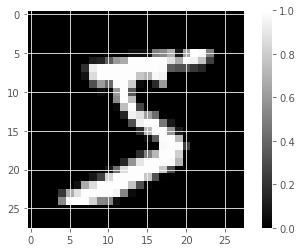

In [21]:
plt.imshow(x_train[0], cmap = 'gray' )
plt.colorbar()
plt.savefig('digit-mnist-single-digit.jpg')
plt.show()

Currently, the pixel values are between 0 to 255. We need to scale them to be within the range of 0 to 1. This is needed before we give the images to the neural network for training.

We can simply carry out the following step to scale the pixel values for our images.

In [ ]:
!pip install matplotlib

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Now, let's visualize the images along with the labels.

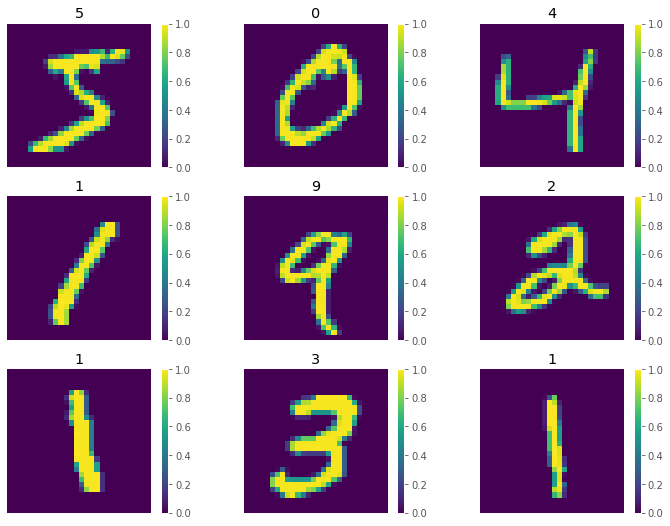

In [8]:
plt.figure(figsize=(12, 9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.axis('off')
    plt.imshow(x_train[i])
    plt.colorbar()
    plt.title(y_train[i])
plt.savefig('digit-mnist-images-with-labels.jpg')
plt.show()

## Build and Train the Neural Network Model

### Stack the Layers

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


### Compile the Model

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Train the Model

In [11]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.4299 - accuracy: 0.8798
Epoch 2/10
1875/1875 [==============================] - 1s 656us/step - loss: 0.1153 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.0787 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 1s 665us/step - loss: 0.0537 - accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 1s 647us/step - loss: 0.0411 - accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 1s 658us/step - loss: 0.0328 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 1s 647us/step - loss: 0.0246 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 1s 640us/step - loss: 0.0191 - accuracy: 0.9942
Epoch 9/10
1875/1875 [==============================] - 1s 653us/step - loss: 0.0156 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 1s 667u

## Plot the Accuracy and Loss Line Graphs

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [13]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']

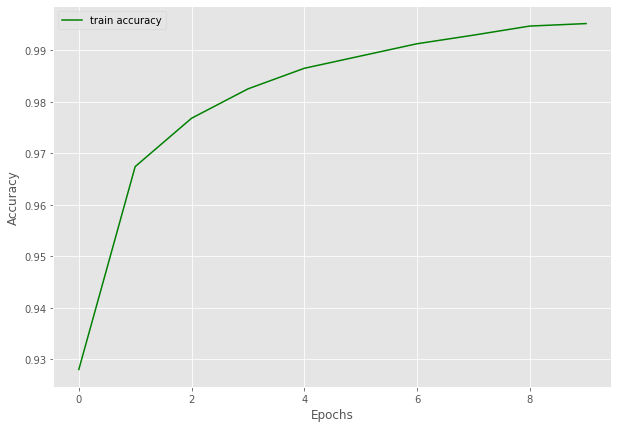

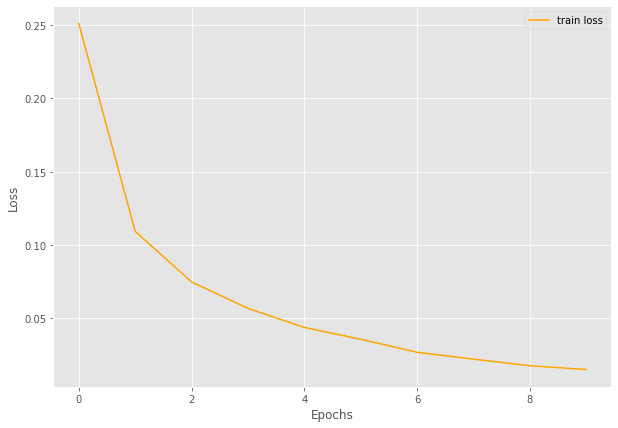

In [14]:
# accuracy plot
plt.figure(figsize=(10, 7))
plt.plot(
    train_acc, color='green', linestyle='-', 
    label='train accuracy'
)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('digit-mnist-accuracy.jpg')
plt.show()
# loss plot
plt.figure(figsize=(10, 7))
plt.plot(
    train_loss, color='orange', linestyle='-', 
    label='train loss'
)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('digit-mnist-loss.jpg')
plt.show()

## Evaluation Accuracy and Loss on the Test Set

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 0s 551us/step - loss: 0.0840 - accuracy: 0.9775


In [16]:
print(f"Test accuracy: {test_acc*100:.3f}")
print(f"Test loss: {test_loss:.3f}")

Test accuracy: 97.750
Test loss: 0.084


## Generate the Classification Report

In [17]:
y_pred = model.predict_classes(x_test)
cls_report = classification_report(y_test, y_pred)

for i in range(9):
    print(f"Class {i}: Digit {i}")
print(cls_report)

Class 0: Digit 0
Class 1: Digit 1
Class 2: Digit 2
Class 3: Digit 3
Class 4: Digit 4
Class 5: Digit 5
Class 6: Digit 6
Class 7: Digit 7
Class 8: Digit 8
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



/home/makama/anaconda3/envs/app/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
